## ***Importing the libraries***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ***Importing the dataset***

In [ ]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# ***Encode Categorical Features***

In [ ]:
data['sex']=data['sex'].apply(lambda x: 1 if x=='male' else 0)

In [ ]:
data['smoker']=data['smoker'].apply(lambda x: 1 if x=='yes' else 0)

In [ ]:
data['region'] = data['region'].apply(lambda x: 0 if x == 'southwest' else (1 if x == 'southeast' else (2 if x == 'northwest' else 3)))

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


# ***EDA***







In [ ]:
data.corr()['charges'].sort_values()

region      0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<Axes: >

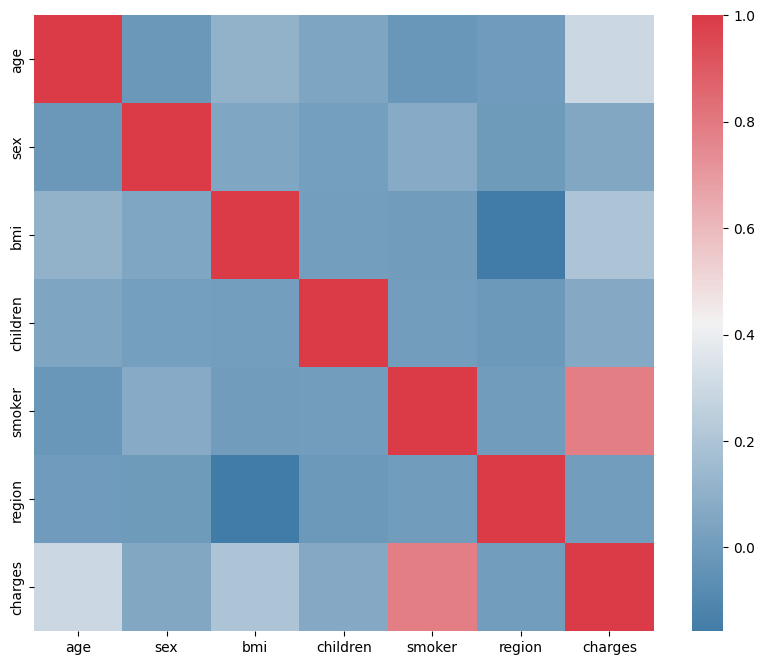

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(240, 10, as_cmap=True))

In [ ]:
#Distribution of Charges

Text(0.5, 1.0, 'Distribution of Charges')

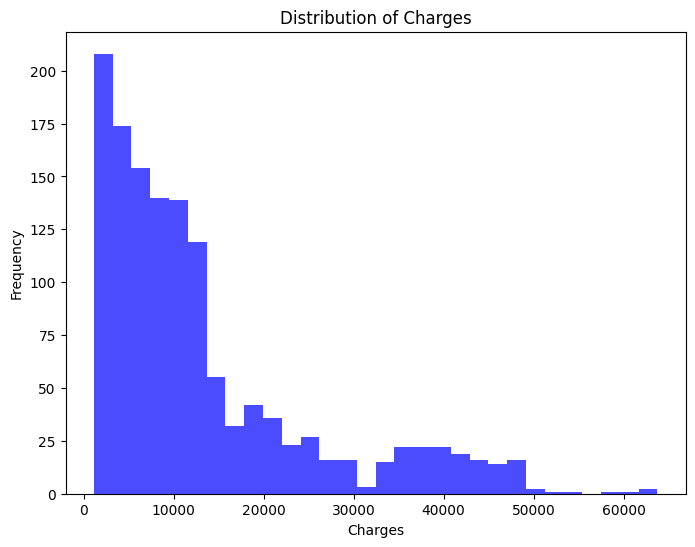

In [ ]:
# Create a larger figure
plt.figure(figsize=(8, 6))

# Plot a histogram of the "charges" data
plt.hist(data["charges"], bins=30, color="blue", alpha=0.7)
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Distribution of Charges")

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

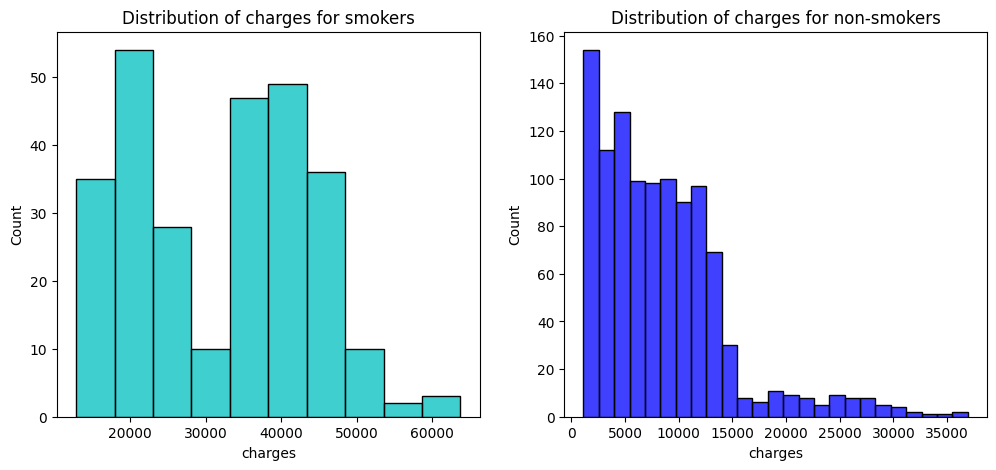

In [ ]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.histplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.histplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

## ***number of patients***

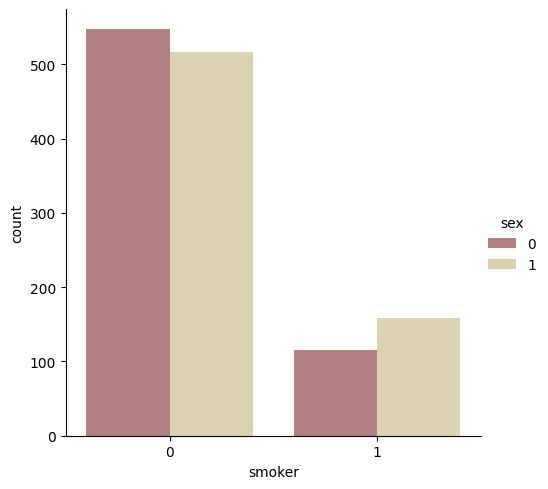

In [ ]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

In [ ]:
#age vs charges

In [ ]:
#non - smokers
from bokeh.plotting import figure, show
p = figure(width=500, height=450)
p.circle(x=data[(data.smoker == 0)].age, y=data[(data.smoker == 0)].charges, size=7, line_color="navy", fill_color="pink", fill_alpha=0.9)
show(p)

In [ ]:
#smokers
p = figure(width=500, height=450)
p.circle(x=data[(data.smoker == 1)].age,y=data[(data.smoker == 1)].charges, size=7, line_color="navy", fill_color="red", fill_alpha=0.9)
show(p)

Text(0.5, 1.0, 'Smokers and non-smokers')

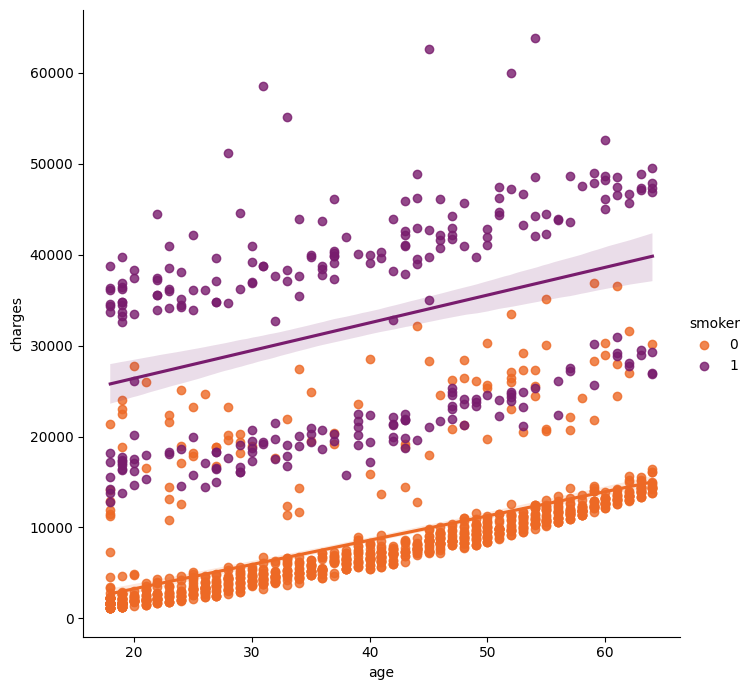

In [ ]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r', height=7)
ax.set_title('Smokers and non-smokers')

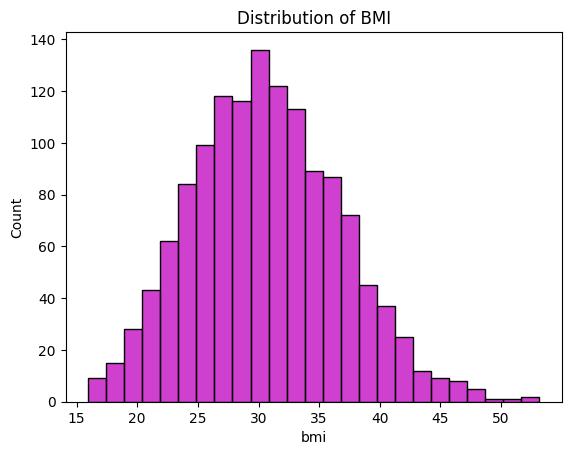

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram using histplot
sns.histplot(data=data, x="bmi", color="m")

# Set a title for the plot
plt.title('Distribution of BMI')

# Show the plot
plt.show()


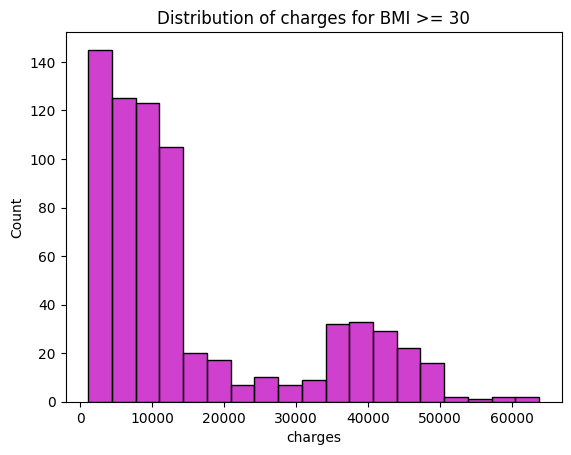

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of charges for data where BMI is greater than or equal to 30 using histplot
sns.histplot(data=data[data.bmi >= 30], x="charges", color="m")

# Set a title for the plot
plt.title('Distribution of charges for BMI >= 30')

# Show the plot
plt.show()


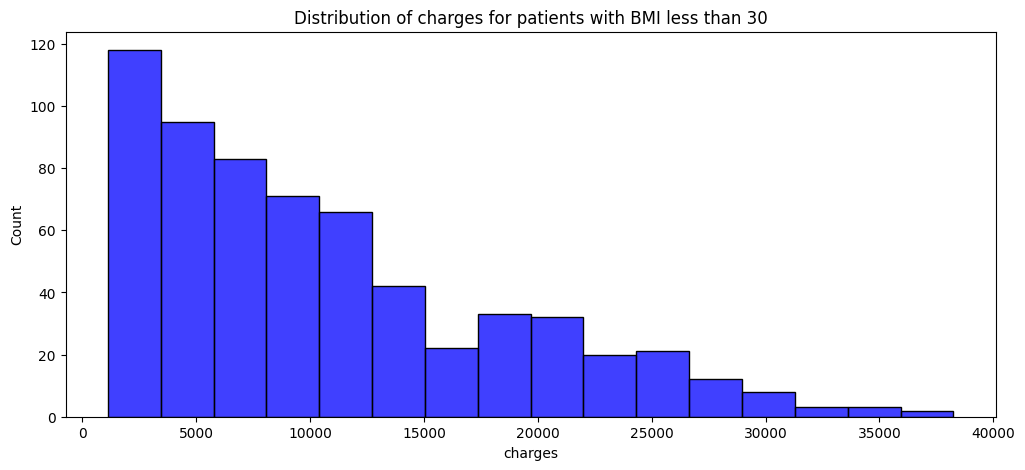

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a larger figure
plt.figure(figsize=(12, 5))
plt.title("Distribution of charges for patients with BMI less than 30")

# Create a histogram of charges for patients with BMI less than 30 using histplot
sns.histplot(data=data[data.bmi < 30], x="charges", color="b")

# Show the plot
plt.show()


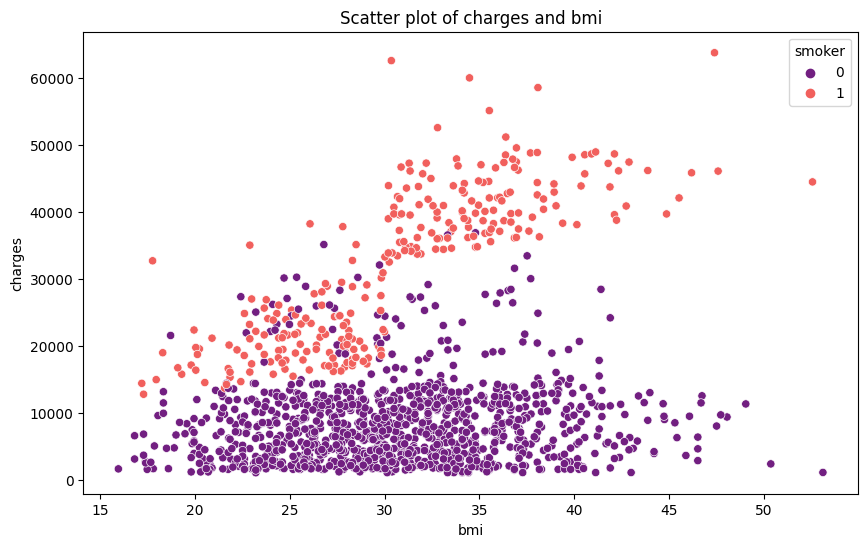

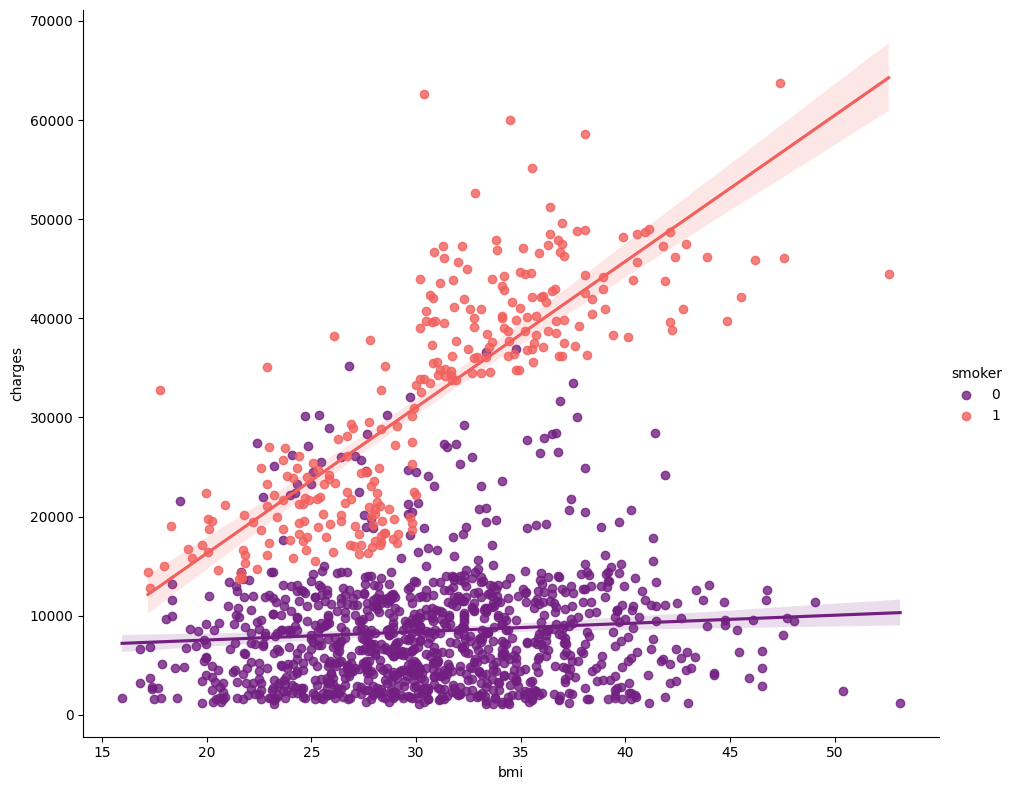

In [77]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette="magma", height=8, aspect=1.2)


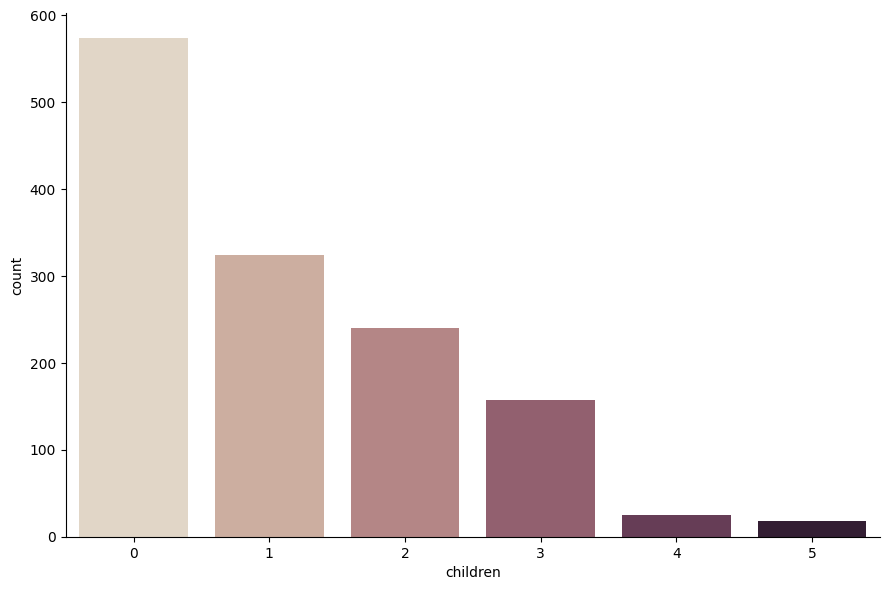

In [ ]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, height=6, aspect=1.5)

Text(0.5, 1.0, 'Smokers and non-smokers who have children')

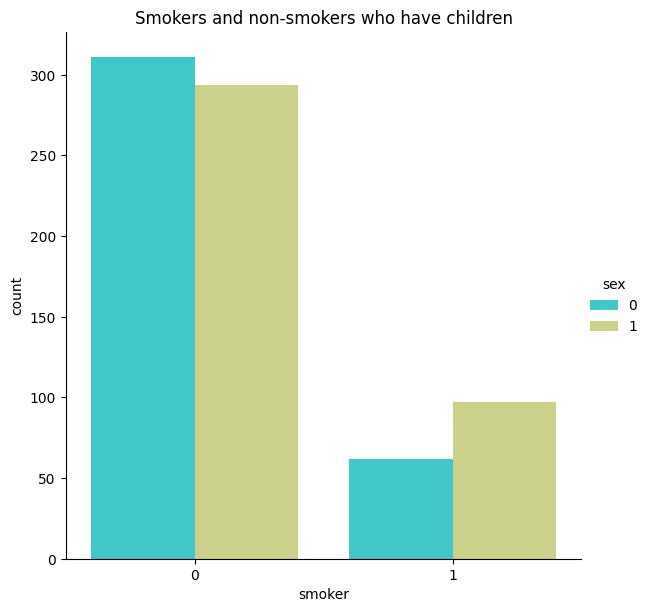

In [ ]:

catplot = sns.catplot(x="smoker", kind="count", palette="rainbow", hue="sex", data=data[data.children > 0], height=6)
catplot.ax.set_title('Smokers and non-smokers who have children')


## ***linear regression***

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [79]:
x = data.drop(['charges'], axis = 1)
y = data.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7962732059725786


In [80]:
X = data.drop(['charges','region'], axis = 1)
Y = data.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8849197344147227


In [83]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor with the 'squared_error' criterion
forest = RandomForestRegressor(criterion='squared_error', random_state=1, n_jobs=-1)

# Now, you can fit the model and continue with your code
forest.fit(x_train, y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)


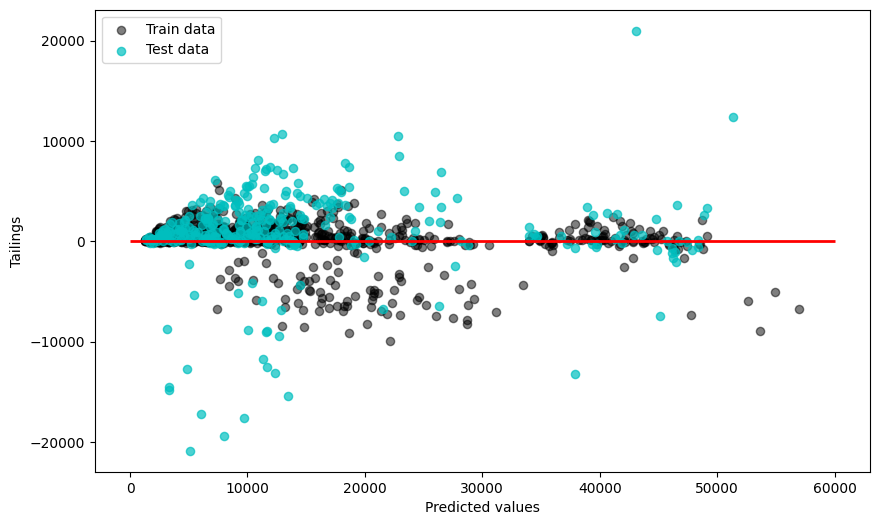

In [86]:
import matplotlib.pyplot as plt  # Import matplotlib

# Assuming you've already fitted your random forest model

plt.figure(figsize=(10, 6))

plt.scatter(forest_train_pred, forest_train_pred - y_train,
            c='black', marker='o', s=35, alpha=0.5, label='Train data')
plt.scatter(forest_test_pred, forest_test_pred - y_test,
            c='c', marker='o', s=35, alpha=0.7, label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=60000, lw=2, color='red')
plt.show()
